<a href="https://colab.research.google.com/github/JatinderMalhi/deeplearning/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#creating two tensorflow variables W and b
class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation

    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval = 0, maxval = 1e-1)
    self.W = tf.Variable(w_initial_value)

    b_shape = output_size
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
    return [self.W, self.b]

In [2]:
import tensorflow as  tf

In [3]:
#Sequential class to chain the layers
class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x = layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights

In [4]:
model = NaiveSequential([NaiveDense(input_size = 28*28, output_size = 512, activation = tf.nn.relu), 
                         NaiveDense(input_size = 512, output_size=10, activation = tf.nn.softmax)])
assert len(model.weights) == 4

In [5]:
import math

class BatchGenerator:
  def __init__(self, images, labels, batch_size =128):
    assert len(images) == len(labels)
    self.index = 0
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches = math.ceil(len(images)/ batch_size)

  def next(self):
    images = self.images[self.index: self.index + self.batch_size]
    labels = self.labels[self.index: self.index + self.batch_size]
    self.index+=self.batch_size
    return images, labels

In [6]:
#computing gradient descent
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate = 1e-3)

def update_weights(gradients, weights):
  optimizer.apply_gradients(zip(gradients, weights))

def one_training_step(model, images_batch, labels_batch):
  with tf.GradientTape() as tape:
    predictions = model(images_batch)
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
    average_loss = tf.reduce_mean(per_sample_losses)
  gradients = tape.gradient(average_loss, model.weights)
  update_weights(gradients, model.weights)
  return average_loss

In [7]:
#full training loop
def fit(model, images, labels, epochs, batch_size =128):
  for epoch_counter in range(epochs):
    print(f"Epoch {epoch_counter} ")
  
  batch_generator = BatchGenerator(images, labels)

  for batch_counter in range(batch_generator.num_batches):
    images_batch, labels_batch = batch_generator.next()
    loss = one_training_step(model, images_batch, labels_batch)
    if batch_counter % 100 ==0:
      print(f"loss at batch {batch_counter} : {loss: .2f} ")

In [8]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images =test_images.reshape((10000, 28*28))
test_labels = test_images.astype('float32')/255

fit(model, train_images, train_labels, epochs =10, batch_size =128)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 0 
Epoch 1 
Epoch 2 
Epoch 3 
Epoch 4 
Epoch 5 
Epoch 6 
Epoch 7 
Epoch 8 
Epoch 9 
loss at batch 0 :  7.04 
loss at batch 100 :  2.24 
loss at batch 200 :  2.18 
loss at batch 300 :  2.08 
loss at batch 400 :  2.21 


In [9]:
x = tf.random.normal(shape = (3, 1), mean = 0, stddev = 1)
print(x)

tf.Tensor(
[[0.4545245 ]
 [0.6422433 ]
 [0.79451174]], shape=(3, 1), dtype=float32)


In [10]:
x = tf.random.uniform(shape = (3, 1), minval = 0, maxval = 1)
print(x)

tf.Tensor(
[[0.1724447 ]
 [0.11242902]
 [0.39389837]], shape=(3, 1), dtype=float32)


In [11]:
v = tf.Variable(initial_value=tf.random.normal(shape = (3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1341358 ],
       [-0.09547807],
       [ 0.9430152 ]], dtype=float32)>


In [12]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [14]:
import numpy as np

In [15]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0, 3],
                                                 cov = [[1, 0.5], [0.5, 1]],
                                                 size = num_samples_per_class)

positive_samples =np.random.multivariate_normal(mean = [3, 0],
                                                cov = [[1, 0.5], [0.5, 1]],
                                                size = num_samples_per_class)


In [16]:
#stacking two classes
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

In [18]:
import matplotlib.pyplot as plt

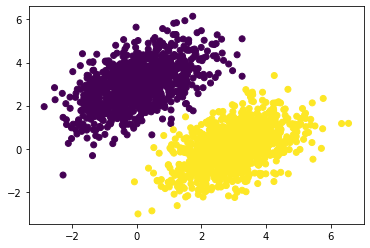

In [19]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [20]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim)))

In [21]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [22]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return  tf.reduce_mean(per_sample_losses)

In [23]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss



In [24]:
#batch training
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.3699
Loss at step 1: 0.0945
Loss at step 2: 0.0844
Loss at step 3: 0.0788
Loss at step 4: 0.0742
Loss at step 5: 0.0700
Loss at step 6: 0.0661
Loss at step 7: 0.0626
Loss at step 8: 0.0594
Loss at step 9: 0.0565
Loss at step 10: 0.0538
Loss at step 11: 0.0513
Loss at step 12: 0.0491
Loss at step 13: 0.0470
Loss at step 14: 0.0451
Loss at step 15: 0.0434
Loss at step 16: 0.0418
Loss at step 17: 0.0404
Loss at step 18: 0.0390
Loss at step 19: 0.0378
Loss at step 20: 0.0367
Loss at step 21: 0.0357
Loss at step 22: 0.0348
Loss at step 23: 0.0339
Loss at step 24: 0.0331
Loss at step 25: 0.0324
Loss at step 26: 0.0318
Loss at step 27: 0.0312
Loss at step 28: 0.0306
Loss at step 29: 0.0301
Loss at step 30: 0.0297
Loss at step 31: 0.0293
Loss at step 32: 0.0289
Loss at step 33: 0.0285
Loss at step 34: 0.0282
Loss at step 35: 0.0279
Loss at step 36: 0.0276
Loss at step 37: 0.0274
Loss at step 38: 0.0272
Loss at step 39: 0.0270


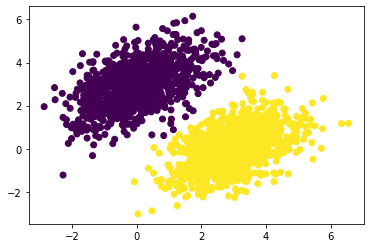

In [25]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

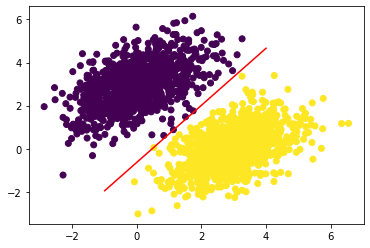

In [26]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1] * x + (0.5 -b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)

In [27]:
from tensorflow import keras

In [28]:
from tensorflow.python.ops.init_ops_v2 import Initializer
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation = None):
      super().__init__()
      self.units = units
      self.activation = activation
  
  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape = (input_dim, self.units),
                             initializer = 'random_normal')
    self.b = self.add_weight(shape = (self.units), initializer = 'zeros')
  
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [29]:
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2, 784))
output_tensor = my_dense(input_tensor) 
print(output_tensor)

tf.Tensor(
[[0.         0.45127887 0.         0.3750459  0.         0.
  0.         0.20964661 0.50851357 1.3107678  0.         0.
  0.44862038 0.         0.         0.         0.         0.64535296
  0.         0.         0.         0.         0.5715425  0.69268596
  4.2268596  0.4465267  0.         0.         0.7015892  0.1885541
  0.         0.        ]
 [0.         0.45127887 0.         0.3750459  0.         0.
  0.         0.20964661 0.50851357 1.3107678  0.         0.
  0.44862038 0.         0.         0.         0.         0.64535296
  0.         0.         0.         0.         0.5715425  0.69268596
  4.2268596  0.4465267  0.         0.         0.7015892  0.1885541
  0.         0.        ]], shape=(2, 32), dtype=float32)


In [30]:
model = keras.Sequential([keras.layers.Dense(1)])


In [31]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.1), 
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.BinaryAccuracy()])
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs = 5,
    batch_size = 16,
    validation_data = (val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 3s 14ms/step - loss: 0.2958 - binary_accuracy: 0.9107 - val_loss: 0.0248 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0734 - binary_accuracy: 0.9550 - val_loss: 0.0922 - val_binary_accuracy: 0.9500
Epoch 3/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0779 - binary_accuracy: 0.9500 - val_loss: 0.0597 - val_binary_accuracy: 0.9917
Epoch 4/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0632 - binary_accuracy: 0.9686 - val_loss: 0.0939 - val_binary_accuracy: 0.9017
Epoch 5/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0722 - binary_accuracy: 0.9586 - val_loss: 0.1132 - val_binary_accuracy: 0.9217


In [32]:
#Binary classificatin movie reviews
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [33]:
max([max(sequence) for sequence in train_data])

9999

In [34]:
#decoding reviews back to text
word_index = imdb.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reversed_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [36]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) #creating an all-zero matrix
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1 #sets specific indices of resuls[i] to 1s
  return results

#vectorize training data and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [37]:
#vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test =np.asarray(test_labels).astype('float32')

In [38]:
from tensorflow.keras import layers
model = keras.Sequential([
                          layers.Dense(16, activation = 'relu'),
                          layers.Dense(16, activation = 'relu'),
                          layers.Dense(1, activation = 'sigmoid')
])

In [39]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [41]:
#setting aside validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5632 - accuracy: 0.7512 - val_loss: 0.4473 - val_accuracy: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3558 - accuracy: 0.8981 - val_loss: 0.3315 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2495 - accuracy: 0.9232 - val_loss: 0.2875 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1894 - accuracy: 0.9406 - val_loss: 0.2831 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1511 - accuracy: 0.9547 - val_loss: 0.2886 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1229 - accuracy: 0.9641 - val_loss: 0.3364 - val_accuracy: 0.8718
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1019 - accuracy: 0.9701 - val_loss: 0.3107 - val_accuracy: 0.8825
Epoch 8/20
30

In [43]:
#history, which is a dictionary containing data about everything
#that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

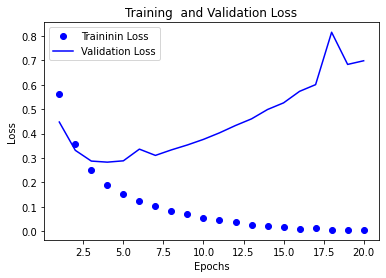

In [44]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Traininin Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training  and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

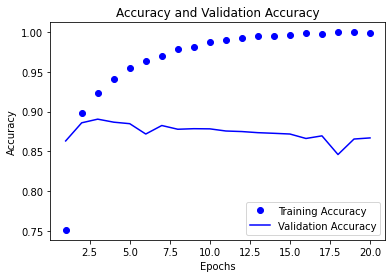

In [46]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Accuracy and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()